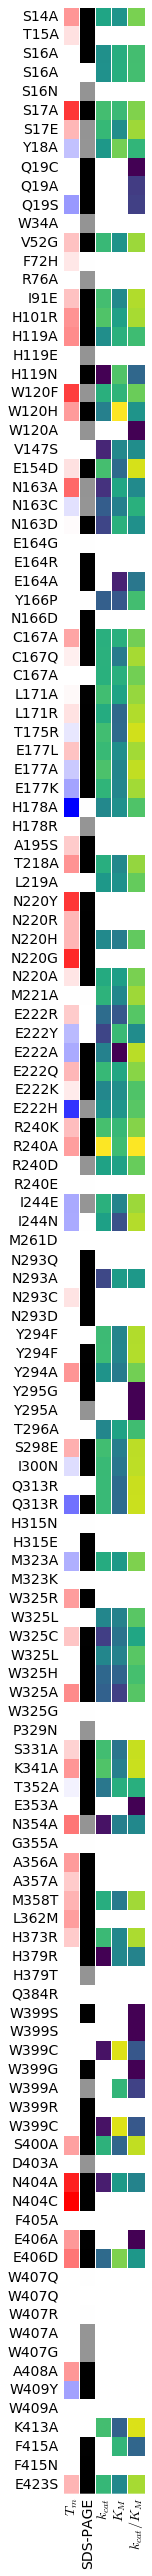

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
from matplotlib import rc 
from numpy import log
import pandas 

df = pandas.read_csv( 'pub_data.csv', index_col='mutant' )
plos = pandas.read_csv( '/Users/alex/Documents/bagel-data/clean_data/clean_for_pandas.csv', index_col='name' )
df = df.join( plos, rsuffix='plos_' ) 

df['pos'] = df.index.str[1:-1].astype( int ) 
df['norm_tm'] = df[ 'tm' ] - 39.5
df['norm_kcat'] = log( df[ 'kcat' ] / 880 )
df['norm_km'] = log( df[ 'km' ] / 0.05 )
df['norm_kcatkm'] = log( df[ 'kcatkm' ] / 174000 )
df = df.sort_values( by='pos' ) 

plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-12.)
rc('axes',edgecolor='white')

font = { 'size': 14 }
rc('font', **font)

plt.subplot( 1, 6, 1 )
plt.imshow( df[ ['norm_tm'] ], interpolation='none', cmap='bwr', origin='upper' ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' )
plt.yticks( range( len( df.index ) ), df.index )
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 2 )
plt.imshow( df[ ['protein_on_gel'] ], interpolation='none', cmap='Greys' ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 

plt.subplot( 1, 6, 3 )
plt.imshow( df[ ['norm_kcat'] ], interpolation='none', cmap='viridis' ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( df[ ['norm_km'] ], interpolation='none', cmap='viridis' ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( df[ ['norm_kcatkm'] ], interpolation='none', cmap='viridis' ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.tight_layout()
plt.show() 